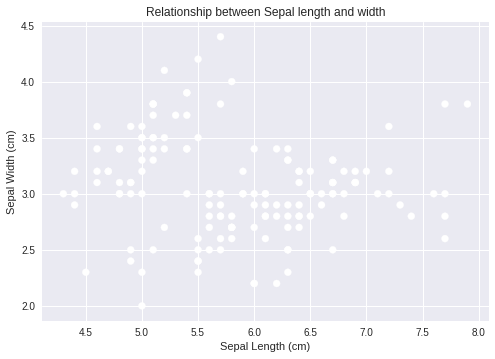

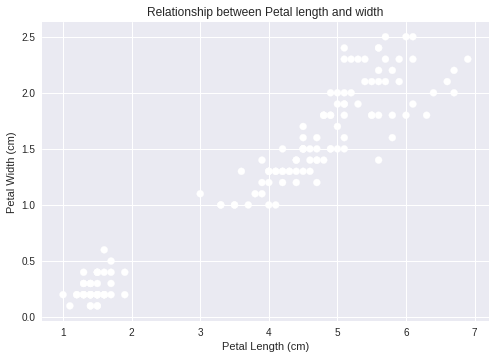

Number of data points in the training set is:  120
Number of data points in the training set is:  120
Number of data points in the testing set is:   30


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


iris = pd.read_csv('iris.csv')

iris.head()


iris.groupby('species').mean()

for index, row in iris.iterrows():
    if row.species == 'Iris-setosa' or row.species == 0:
        iris.iloc[index, 4] = 0
    elif row.species == 'Iris-versicolor' or row.species == 1:
        iris.iloc[index, 4] = 1
    else:
        iris.iloc[index, 4] = 2

iris.head()


sepal_length = iris.iloc[:, 0]
sepal_width = iris.iloc[:, 1]

petal_length = iris.iloc[:, 2]
petal_width = iris.iloc[:, 3]

species = iris.iloc[:, 4]


plt.scatter(sepal_length, sepal_width, c=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Relationship between Sepal length and width')
plt.show()

plt.scatter(petal_length, petal_width, c=species)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Relationship between Petal length and width')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression

# This just rearranges the rows in the dataset so our species aren't all bunched together. 
iris = shuffle(iris)

features = iris.iloc[:, :4]
labels = iris.iloc[:, 4]


features.head()


labels.head()

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)

print("Number of data points in the training set is: ", len(labels_train))
print("Number of data points in the testing set is:  ", len(labels_test))


features_train.head()

labels_train.head()

my_model = LogisticRegression(solver='lbfgs', multi_class='ovr')

my_model.fit(features_train, labels_train)


predictions = my_model.predict(features_test)
print(predictions)

labels = labels_test
print(labels.values)

my_model.score(features_test, labels_test)

from collections import Counter

counter = Counter(zip(predictions, labels))

s = [10*counter[(p, l)] for p, l in zip(predictions, labels)]

plt.scatter(predictions, labels.values, s=s)
plt.xlabel('predictions')
plt.ylabel('actual label')
plt.annotate('This one point indicates that our model predicted virginica, but the actual species was versicolor. Too bad!', 
             xy=(2, 1), xytext=(2.25, 0.75), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('These are larger as the size indicated how many points are at this point',
             xy=(0, 0.05), xytext=(2.3, 0.25), arrowprops=dict(facecolor='green', shrink=0.05))